<a href="https://colab.research.google.com/github/PosgradoMNA/ML2-Equipo_7-sep-2023/blob/main/A2c_DL_TC5033_AD2023_Maricelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




In [1]:
pip install torch


In [2]:
pip install torchvision


In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader #Convierte este datasets es un objeto iterable de pytorch, permite hacer los minibatches automatico, los podamos mandar al modelo en el proceso de train
from torch.utils.data import sampler #nos permite hacer muestra aleatoria de los datos
import torchvision.datasets as datasets #Contiene base de datos precargadas para validar nuestro modelo, nos agrupa las imagenes con sus respectivas etiquetas
import torchvision.transforms as T #Hacer transformaciones a los datos
from torchvision import models #contiene varios modelos preentrenados

In [4]:
import matplotlib.pyplot as plt

### Descargar sets de datos

El Instituto Canadiense de Investigaciones Avanzadas elaboró un conjunto de datos estándar sobre visión por computador y aprendizaje profundo para este problema. (CIFAR).
El conjunto de datos CIFAR-10 consta de 60.000 fotos divididas en 10 clases (de ahí el nombre CIFAR-10)1. Las clases incluyen objetos comunes como aviones, automóviles, aves, gatos, etc. en. El conjunto de datos se divide de forma estándar, donde se utilizan 50.000 imágenes para la formación de un modelo y los 10.000 restantes para evaluar su desempeño. Las imágenes están en los 3 canales (rojo, verde y azul) y son cuadrados pequeños que miden 32 x 32 píxeles.

Descargamos los datos desde Pytorch

In [5]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/cifar-10/cifar-10-batches-py'
DATA_PATH = '/home/pepe/Documents/github_repos/datasets/cifar-10-batches-py' #ruta donde vamos a guardar los datos
NUM_TRAIN = 45000 #imagenes para entrenamiento
MINIBATCH_SIZE = 64
transform_imagenet = T.Compose([ #convertir a tensores y normalizar, por cada uno de los canales: rojo, verde y azul, valores estandar
                T.Resize(224), #224*224 el tamaño de imagenet
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #media y desviación estandar
            ])

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, #descargar de dataset los datos y se cargar en el DATA_PATH
                             transform=transform_imagenet) #transformación
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,  #mandar este dataset a DataLoader, indicamos los minibatches y muestreo aleatorio desde 0 a 45000
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

100%|██████████| 170498071/170498071 [00:03<00:00, 43748945.30it/s]


Extracting /home/pepe/Documents/github_repos/datasets/cifar-10-batches-py/cifar-10-python.tar.gz to /home/pepe/Documents/github_repos/datasets/cifar-10-batches-py
Files already downloaded and verified
Files already downloaded and verified


In [6]:
#Interación de los minibatches
for i, (x, y) in enumerate(val_loader): #mostrar como se pueden iterar nuestro dataloader de validación
    print(i, x.shape, y.shape) #cada minibacth es de 64 elementos, imagenes 224*224 por 3 canales, la forma de y es de 64

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

In [7]:
#Interación de los minibatches
for i, (x, y) in enumerate(test_loader): #mostrar como se pueden iterar nuestro dataloader de validación
    print(i, x.shape, y.shape) #cada minibacth es de 64 elementos, imagenes 224*224 por 3 canales, la forma de y es de 64

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Usar GPU

In [8]:
if torch.cuda.is_available(): #seleccionar si vamos a utilizar cpu y gpu
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: Ship


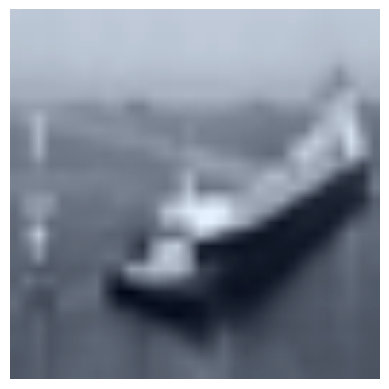

In [9]:
#Mostrar una imagen de forma aleatoria de nuestros datos de prueba
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Calcular Accuracy

In [10]:
def accuracy(model, loader):#modelo y un dataloader que nos va a permitir iterar a traves de los datos, a traves de los minibatches

  num_correct = 0 #numeros de correctas
  num_total = 0 #numeros de imagenes totales
  model.eval() #modelo en modo evaluación, algunas capas se comportan difernete en modo de evaluación o en modo entrenamiento como la capa batch normalization, solo interesa accuracy, no nos interesa entrenar
  model = model.to(device=device) #asegruarnos que el modelo este en el dispositivo gpu que estamos utilizando para entrenar

  with torch.no_grad(): #no vamos a calcular el gradiente, porque estamos calculando el accuracy
      for xi, yi in loader: #mandamos a generar los minibatches directamente del Dataloader, nos regresa una tupla, no se usa enumarate porque no nos interesa imprimir los indices de cada uno de minibatches
          xi = xi.to(device=device, dtype = torch.float32) #pasar los datos a GPU, tanto imagenes como etiquetas
          yi = yi.to(device=device, dtype = torch.long) #etiquetas

          scores = model(xi) #corremos modelos y nos regresa los score
          _, pred = scores.max(dim=1) #de los scores sacamos cual es el que tiene el max score, nos regresa el indice del elemento para todos los elementos del minibatch, indice nos representa la clase
          num_correct += (pred == yi).sum() #se compara la prediccion directamente con la clase correcta para todos los elementos del minibatch , en este caso 64 elementos, 1 donde corresponde, 0 donde no corresponde
          #se suman y se acumulan en la variable num_correct, de 64 elementos de un minibatch, 55 son correctos, nos acumula esos 55
          num_total += pred.size(0) #total de elementos

      return float(num_correct)/num_total


### Loop de entrenamiento

In [11]:
def train(model, optimiser, epochs=100):
#     def train(model, optimiser, scheduler = None, epochs=100):
    model = model.to(device=device) #pasar modelo a nuestro dispositivo
    for epoch in range(epochs):
        for (xi, yi) in train_loader: #Recorrer minibacthes haciendo uso del objeto train_loader,
            model.train() #modo entrenamiento
            xi = xi.to(device=device, dtype=torch.float32) #pasar imagenes a memoria
            yi = yi.to(device=device, dtype=torch.long) #pasar etiquetas a memoria
            scores = model(xi) #corremos modelos y nos regresa los score

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()  #borramos los gradientes ya calculados, dejando en 0.
            cost.backward() #mandar a llamar la función backward que nos calcula los gradientes para todos los parametros del modelo
            optimiser.step() #step que nos va hacer la actualización de nuestros parametros de acuerdo al optimiser que utilicemos

        acc = accuracy(model, val_loader) #calcular accuracy llamando las funcion pero con los datos de validación
        if epoch%2 == 0:      #cada 2 epoch imprimir accuracy y para los datos de validación

          print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
  #         scheduler.step()

### Linear model

In [14]:
#Implementar modelo lineal, 20 epochs, y modelo de 3 capas

hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 20
model1 = nn.Sequential(nn.Flatten(), #nos permite poner la imagen en forma de vector(imagen de 3 canales)
                        nn.Linear(in_features=224*224*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))

#model1 = nn.Sequential(model_aux,
 #                      nn.Flatten(),
  #                     nn.Linear(in_features=512, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))


In [15]:
train(model1, optimiser, epochs) #Correr-

Epoch: 0, costo: 1.8933305740356445, accuracy: 0.39,
Epoch: 2, costo: 1.7248671054840088, accuracy: 0.4436,
Epoch: 4, costo: 0.6786208748817444, accuracy: 0.457,
Epoch: 6, costo: 1.4858675003051758, accuracy: 0.4676,
Epoch: 8, costo: 1.248151183128357, accuracy: 0.4826,
Epoch: 10, costo: 1.113479495048523, accuracy: 0.4982,
Epoch: 12, costo: 1.2704482078552246, accuracy: 0.5078,
Epoch: 14, costo: 0.7374410629272461, accuracy: 0.5004,
Epoch: 16, costo: 0.5852033495903015, accuracy: 0.4872,
Epoch: 18, costo: 1.2238508462905884, accuracy: 0.4924,


In [16]:
accuracy(model1, test_loader)

0.4987

Podemos observar que el modelo nos proporciona una precisión del 50%, lo que claramente representa un rendimiento bastante deficiente. Incluso si optimizamos los parámetros del modelo, es poco probable que alcancemos una precisión superior al 65%. Por lo tanto, en este punto, repetiremos el proceso, pero esta vez incorporaremos el Aprendizaje por Transferencia (Transfer Learning), aprovechando un modelo pre-entrenado, en este caso, el modelo ResNet-18.

### Implementación del Transfer Learning

### Cargar modelo pre-cargado

In [17]:
model_resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 259MB/s]


#### Exploremos el modelo

In [18]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Podemos observar que la primera capa convolucional se configura como conv2 (3 canales de entrada, 64 canales de salida), y la última capa es una capa de promediado (avgpool) y es una capa linealq que recibe 512 características y se conecta con 1000 neuronas de salida. Para adaptar este modelo a nuestras necesidades, reemplazaremos la última capa con una capa de dimensiones apropiadas que constará de 10 neuronas de salida.

Dado que este modelo es considerablemente grande y nuestros recursos para el entrenamiento son limitados, hemos decidido congelar el cuerpo del modelo. En consecuencia, solo entrenaremos las capas que hemos agregado. En cada iteración, experimentaremos un proceso de aprendizaje en el que el modelo preentrenado extraerá las características más relevantes y las transmitirá a nuestra última capa. Esta última capa será la encargada de aprender y ajustar esas características a los datos de nuestro conjunto de datos.


Es importante destacar que los modelos preentrenados incluyen un metódo conocido como "parámetros". Cada uno de estos parámetros está asociado con un atributo llamado "requires_grad", el cual determina si el parámetro es susceptible de entrenamiento o no, a continuación veremos si los parámetros son entrenables o no:

In [19]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

Es evidente que disponemos de 61 capas de parámetros entrenables, todas con el atributo "requires_grad" establecido en verdadero, lo que significa que sería posible seguir entrenando estos parámetros. Sin embargo, llevar a cabo dicho proceso resultaría en un alto costo computacional. Por lo tanto, optamos por establecer este atributo como falso con el propósito de congelar todas estas capas, y así, centrarnos exclusivamente en el entrenamiento de nuestra última capa:

#### Ajustar a nuestro modelo

In [20]:
#Crear un modelo auxiliar que hará uso del bloque Sequential y vamos a ingresarle todas las capas que están dentro del modelo Resnet18

model_aux = nn.Sequential(*list(model_resnet18.children())) #convertir a lista y usando el *, pasa los elementos desempacados o individuales
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [21]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1]) #quitar la última capa

In [22]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Podemos observar que el modelo ya no incorpora la capa lineal final



In [23]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False #congelar el atributo para no entrenar estas capas

In [24]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad) #podemos observar que el atributo ya se encuentra en falso.

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False


Podemos notar que el atributo "require_grad" está establecido en "false" para todos los parámetros, lo que indica que estos ya no son entrenables.

### Loop de entrenamiento

In [25]:
def train(model, optimiser, epochs=100):
#     def train(model, optimiser, scheduler = None, epochs=100):
    model = model.to(device=device) #pasar modelo a nuestro dispositivo
    for epoch in range(epochs):
        for (xi, yi) in train_loader: #Recorrer minibacthes haciendo uso del objeto train_loader,
            model.train() #modo entrenamiento
            xi = xi.to(device=device, dtype=torch.float32) #pasar imagenes a memoria
            yi = yi.to(device=device, dtype=torch.long) #pasar etiquetas a memoria
            scores = model(xi) #corremos modelos y nos regresa los score

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()  #borramos los gradientes ya calculados, dejando en 0.
            cost.backward() #mandar a llamar la función backward que nos calcula los gradientes para todos los parametros del modelo
            optimiser.step() #step que nos va hacer la actualización de nuestros parametros de acuerdo al optimiser que utilicemos

        acc = accuracy(model, val_loader) #calcular accuracy llamando las funcion pero con los datos de validación
#        if epoch%5 == 0:      #cada 5 epoch imprimir accuracy y para los datos de validación

        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
  #         scheduler.step()

### Linear model

In [26]:
#Implementar modelo lineal, mandarle como primera capa todos los bloques de capas preentrenadas y al final pasar las capas que queremos entrenar
#La última capa se dejará los features de entrada originales 512 y los features de salida si se van a cambiar a 10

hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 5

#model1 = nn.Sequential(nn.Flatten(), #nos permite poner la imagen en forma de vector(imagen de 3 canales)
#                       nn.Linear(in_features=224*224*3, out_features=hidden1), nn.ReLU(),
#                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
#                      nn.Linear(in_features=hidden, out_features=10))

model1 = nn.Sequential(model_aux, #este modelo no tiene la ultima capa
                        nn.Flatten(), #forma de vector
                         nn.Linear(in_features=512, out_features= 10, bias= True)) #esta seria la ultima capa que se elimino del modelo aux, pero con 10 neuronas de salida

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))


In [27]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Podemos notar que la estructura "Sequential" incluye todas las capas presentes en el modelo ResNet-18. Sin embargo, la última capa se diferencia al incorporar una capa de aplanamiento (Flatten) y una capa lineal basada en las características que hemos definido previamente. Ahora, estamos listos para iniciar el entrenamiento de nuestro modelo utilizando el optimizador, aprovechando así el modelo preentrenado:


In [28]:
train(model1, optimiser, epochs) #Correr-

Epoch: 0, costo: 0.614666759967804, accuracy: 0.7796,
Epoch: 1, costo: 0.6801086068153381, accuracy: 0.7914,
Epoch: 2, costo: 0.3714248538017273, accuracy: 0.8012,
Epoch: 3, costo: 0.8842516541481018, accuracy: 0.7992,
Epoch: 4, costo: 0.6235138773918152, accuracy: 0.8056,


In [30]:
accuracy(model1, test_loader)

0.8005

Podemos observar la precisión del modelo(Accuracy) ha experimentado un incremento del 40%, alcanzando un 80%, en comparación con el 50% de precisión obtenido con el modelo de 3 capas lineales. Este aumento se logró mediante el cambio de la última capa en el modelo preentrenado ResNet-18. De este modo, hemos demostrado que la utilización de Transfer Learning es una técnica sumamente poderosa, que, en el contexto de la clasificación de imágenes, suele redundar en mejoras significativas en el rendimiento de nuestros modelos.

###Conclusiones

Aplicamos la técnica de Transfer Learning, que implica utilizar un modelo preentrenado, en este caso, ResNet-18, para transferir su capacidad de abstracción a nuestro problema específico. Los siguientes pasos describen cómo lo logramos:

1. Descargamos un modelo preentrenado que se convierte en un bloque de nuestro modelo, adaptándolo a nuestro problema particular.

2. Eliminamos la última capa del modelo preentrenado y la reemplazamos por una capa acorde a las características de nuestro problema. En el caso de la base de datos CIFAR-10, ajustamos esta capa final para que tenga 10 clases, en lugar de las 1000 clases originales de ImageNet.

3. Lo anterior, nos da un bloque de todas las capas del modelo ResNet-18, seguido por nuestra capa lineal adaptada a las necesidades de nuestro problema.

4. Aunque podríamos haber utilizado más capas, logramos un 80% de precisión con tan solo 5 épocas.

5. En una etapa posterior, podriamos descongelar los parámetros de ResNet-18 y realizar 2 épocas con una tasa de aprendizaje baja para afinar aún más nuestro modelo.